In [69]:
# Hugging Face dataset bootstrapping
OWNER_NAME = 'competitions/'
DATASET_NAME = 'aiornot'

!pip install -Uqq datasets
!pip install -Uqq python-dotenv

from dotenv import load_dotenv
import os
from pathlib import Path
from datasets import load_dataset


load_dotenv('/notebooks/.env')
access_token = os.environ.get('HF_TOKEN')
DOWNLOADS = Path('downloads')


print('about to download', OWNER_NAME+DATASET_NAME, 'to', DOWNLOADS)
ds = load_dataset(OWNER_NAME+DATASET_NAME, use_auth_token=access_token)
print('done')

about to download competitions/aiornot to downloads


Using custom data configuration competitions--aiornot-c64672d1851055ac
Found cached dataset parquet (/root/.cache/huggingface/datasets/competitions___parquet/competitions--aiornot-c64672d1851055ac/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

done


## Data preprocessing
Moving csv format to images in folders

In [88]:
from datasets import Image as ImageFeature
ds = ds.cast_column('image', ImageFeature())
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'label'],
        num_rows: 18618
    })
    test: Dataset({
        features: ['id', 'image', 'label'],
        num_rows: 43442
    })
})

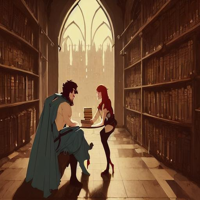

In [73]:
sample_img = ds['train'][1337]['image']
sample_img.thumbnail((200,200))
sample_img

In [74]:
ds['train'].info

DatasetInfo(description='', citation='', homepage='', license='', features={'id': Value(dtype='string', id=None), 'image': Image(decode=True, id=None), 'label': Value(dtype='int64', id=None)}, post_processed=None, supervised_keys=None, task_templates=None, builder_name='parquet', config_name='competitions--aiornot', version=0.0.0, splits={'train': SplitInfo(name='train', num_bytes=710871444, num_examples=18618, shard_lengths=None, dataset_name='parquet'), 'test': SplitInfo(name='test', num_bytes=1665842505, num_examples=43442, shard_lengths=[20861, 21721, 860], dataset_name='parquet')}, download_checksums={'https://huggingface.co/datasets/competitions/aiornot/resolve/799af3344961cbc8bd71c8151db06700e222d9d2/data/train-00000-of-00002-9767f7576a73674b.parquet': {'num_bytes': 353957464, 'checksum': '44bfa05ca357a020877248ea205a3d82cdd0494b6671b4c607dad34a6dd9df58'}, 'https://huggingface.co/datasets/competitions/aiornot/resolve/799af3344961cbc8bd71c8151db06700e222d9d2/data/train-00001-of-0

Let's save the dataset in folders 

In [89]:
path

Path('downloads/aiornot')

In [90]:
path.mkdir(exist_ok=True)

In [91]:
df = ds['train'].to_pandas()
df.head()

,id,image,label
0,0.jpg,"{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' "",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01""\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\...",1
1,1.jpg,"{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' "",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01""\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\...",1
2,2.jpg,"{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' "",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01""\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\...",1
3,3.jpg,"{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' "",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01""\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\...",0
4,4.jpg,"{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' "",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\x00\x02\x00\x03\x01""\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\...",1


<AxesSubplot:>

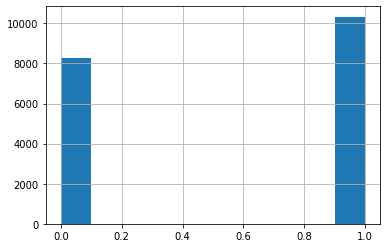

In [119]:
df.label.hist()

In [92]:
test_df = ds['test'].to_pandas()
test_df[['id', 'label']].head()

,id,label
0,0.jpg,-1
1,1.jpg,-1
2,2.jpg,-1
3,3.jpg,-1
4,4.jpg,-1


In [127]:
(path/'train'/'0').mkdir(exist_ok=True)
(path/'train'/'1').mkdir(exist_ok=True)
(path/'test'/'0').mkdir(exist_ok=True)
(path/'test'/'1').mkdir(exist_ok=True)

In [103]:
ds['train'][:2]['id']

['0.jpg', '1.jpg']

In [140]:
from PIL import Image
from tqdm.auto import tqdm

# save train images to folder
for i, fname in tqdm(enumerate(ds['train']['id']), total=ds['train'].num_rows):
    img = ds['train'][i]['image']
    label = str(ds['train'][i]['label'])
    fpath = path/'train'/label/fname
    #print(fpath)
    if not fpath.is_file():
        img.save(fpath)

  0%|          | 0/18618 [00:00<?, ?it/s]

In [156]:
# save test images to folder
# TODO: run!
for i, fname in tqdm(enumerate(ds['test']['id']), total=ds['test'].num_rows):
    img = ds['test'][i]['image']
    label = str(ds['test'][i]['label'])
    fpath = path/'test'/fname
    #print(fpath)
    if not fpath.is_file():
        img.save(fpath)

  0%|          | 0/43442 [00:00<?, ?it/s]

### fastai baseline vision learner

In [146]:
# gpu memory management
import gc, torch
!pip install -Uqq pynvml

def free_gpu():
    gc.collect()
    torch.cuda.empty_cache()
    
def report_gpu():
    print(torch.cuda.list_gpu_processes())
    free_gpu()

In [147]:
report_gpu()

GPU:0
process      29195 uses    14679.000 MB GPU memory


In [141]:
from fastai.vision.all import *

files = get_image_files(path/'train')
len(files)

18618

In [142]:
dls = ImageDataLoaders.from_folder(path/'train', valid_pct=0.25)
print(len(dls.train), len(dls.valid))

218 73


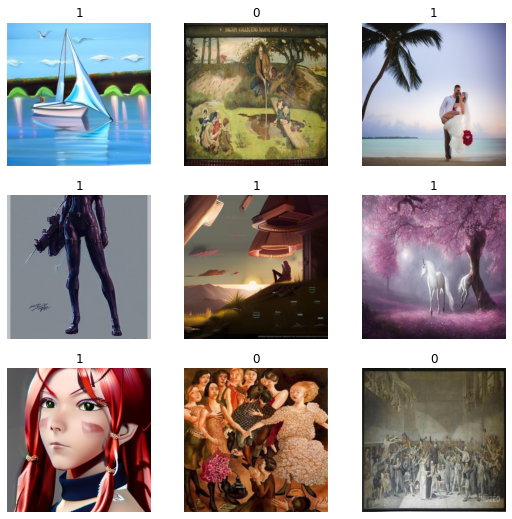

In [143]:
dls.show_batch()

In [144]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [145]:
learn.fine_tune(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.308570,0.175527,0.062742,02:03


epoch,train_loss,valid_loss,error_rate,time
0,0.159592,0.110372,0.042544,02:40
1,0.069070,0.082308,0.031371,02:39
2,0.024688,0.076059,0.025784,02:40


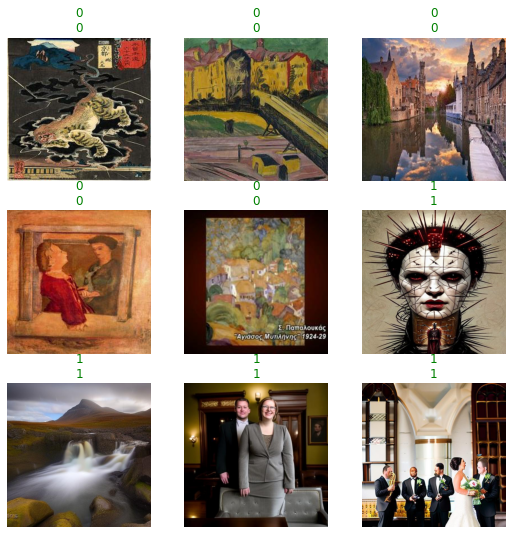

In [151]:
learn.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,4), dpi=60)

In [159]:
interp.most_confused(min_val=5)

[('0', '1', 91), ('1', '0', 29)]

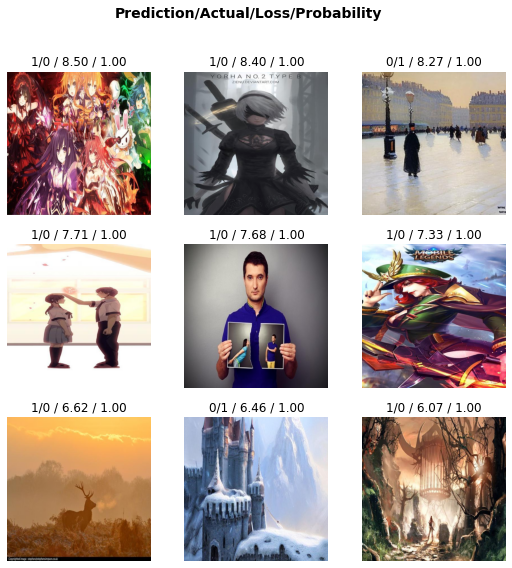

In [160]:
interp.plot_top_losses(9)

In [183]:
y_preds, _ = learn.get_preds()

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_true, y_preds)

In [152]:
learn.recorder

AttributeError: 'Sequential' object has no attribute 'plot_losses'

In [162]:
test_files = get_image_files(path/'test')
len(test_files)

43442

In [163]:
test_dl = learn.dls.test_dl(test_files)
preds, _, decoded = learn.get_preds(dl=test_dl, with_decoded=True)

In [182]:
preds[:, 1]

TensorBase([9.9998e-01, 1.5562e-04, 9.9684e-01,  ..., 2.0520e-07,
            9.9998e-01, 9.9999e-01])

In [164]:
decoded[:9]

TensorBase([1, 0, 1, 0, 1, 1, 1, 1, 1])

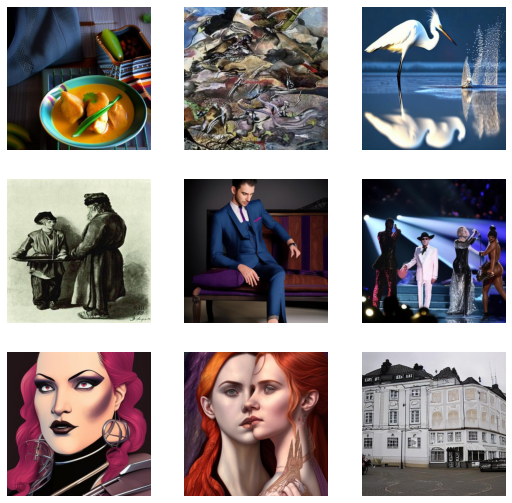

In [165]:
test_dl.show_batch()

In [166]:
len(decoded)

43442

## Evaluate on test files

## Prepare submission file

In [184]:
submission = pd.read_csv(path/'sample_submission.csv')
submission.shape

(43442, 2)

In [186]:
submission.label = decoded
submission

,id,label
0,0.jpg,9.999846e-01
1,1.jpg,1.556160e-04
2,10.jpg,9.968406e-01
3,100.jpg,5.743017e-06
4,1000.jpg,9.999951e-01
...,...,...
43437,9995.jpg,9.411466e-01
43438,9996.jpg,9.996895e-01
43439,9997.jpg,2.051955e-07
43440,9998.jpg,9.999838e-01


In [187]:
submission.label.mean()

0.5629704

## Submit CSV to Hugging Face

In [188]:
# write submission csv
technique = '-resnet34 finetune 3 epochs undecoded-'
sub_filename = Path('subs')/(DATASET_NAME+'-'+technique+'-sub.csv')
submission.to_csv(sub_filename, index=False)
print('done')

done
